In [1]:
import importlib
import numpy as np
import random
import cv2
from PIL import Image
from IPython.display import display

import shapedata
importlib.reload(shapedata)

<module 'shapedata' from '/home/yegor/Projects/interactive-intelligence/emergent-lang/shapedata.py'>

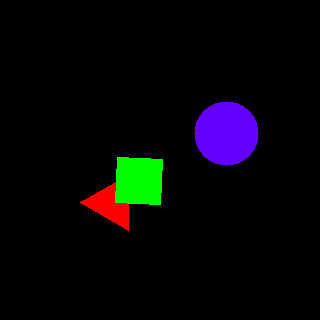

In [2]:
images = np.zeros((8, 320, 320, 3), np.uint8)

shapedata.draw_shapes(images[0], [
    shapedata.Shape('triangle', (255, 0, 0)),
    shapedata.Shape('square', (0, 255, 0)),
    shapedata.Shape('circle', (100, 0, 255))
])

Image.fromarray(images[0])

1.0 4 4


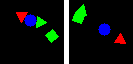

0.0 2 2


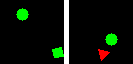

1.0 3 3


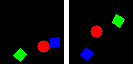

0.0 4 2


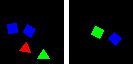

1.0 4 4


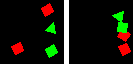

1.0 5 5


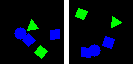

0.0 3 2


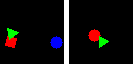

0.0 3 5


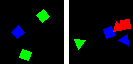

In [3]:
data = shapedata.ShapeData(256, 64)
(x1, x1_shapes), (x2, x2_shapes), y = data.create_batch()

for i in range(8):
    im = Image.fromarray(np.hstack([
        x1[i], np.zeros((x1.shape[1],5,3), np.uint8)+255, x2[i]
    ]))
    print(y[i], len(x1_shapes[i]), len(x2_shapes[i]))
    display(im)

0.0 2 3


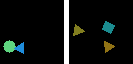

1.0 3 3


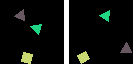

0.0 1 2


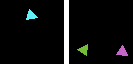

1.0 5 5


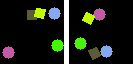

0.0 2 5


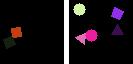

0.0 5 3


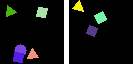

1.0 4 4


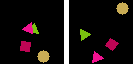

1.0 4 4


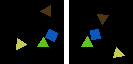

In [4]:
data = shapedata.ShapeData(256, 64, shape_colors=shapedata.pick_random_color)
(x1, x1_shapes), (x2, x2_shapes), y = data.create_batch()

for i in range(8):
    im = Image.fromarray(np.hstack([
        x1[i], np.zeros((x1.shape[1],5,3), np.uint8)+255, x2[i]
    ]))
    print(y[i], len(x1_shapes[i]), len(x2_shapes[i]))
    display(im)

0.0 5 5


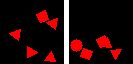

0.0 5 5


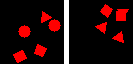

1.0 5 5


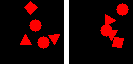

0.0 5 5


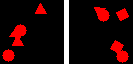

0.0 5 5


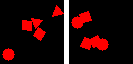

1.0 5 5


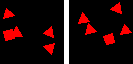

1.0 5 5


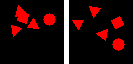

0.0 5 5


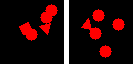

In [5]:
data = shapedata.ShapeData(256, 64, shape_colors=[(255, 0, 0)],
                           min_shapes=5, max_shapes=5)
(x1, x1_shapes), (x2, x2_shapes), y = data.create_batch()

for i in range(8):
    im = Image.fromarray(np.hstack([
        x1[i], np.zeros((x1.shape[1],5,3), np.uint8)+255, x2[i]
    ]))
    print(y[i], len(x1_shapes[i]), len(x2_shapes[i]))
    display(im)